# Secondary Analysis – S1
## Which age group is most affected by air pollution-related health outcomes — and how does this vary by state?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load health dataset with correct encoding
idsp = pd.read_csv('../data/idsp.csv', encoding='ISO-8859-1')

# Preview
idsp.head()


,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,19-04-2025,20-04-2025,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN
3,2025,16,19-04-2025,19-04-2025,Bihar,Gopalganj,Fever with Rash,Reported,5,0,"cases in absolute number, deaths in absolute n...",NaN
4,2025,16,12-04-2025,15-04-2025,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,"cases in absolute number, deaths in absolute n...",NaN


In [4]:
print(idsp.columns)


Index(['year', 'week', 'outbreak_starting_date', 'reporting_date', 'state',
       'district', 'disease_illness_name', 'status', 'cases', 'deaths', 'unit',
       'note'],
      dtype='object')


In [2]:
# Filter data for last 3 years
health = idsp[(idsp['year'] >= 2022) & (idsp['year'] <= 2025)].copy()

# Keep only the relevant columns
health = health[['state', 'district', 'disease_illness_name', 'cases', 'year']]
health.rename(columns={'disease_illness_name': 'disease'}, inplace=True)


In [5]:
age_mapping = {
    'Acute Diarrheal Disease': '0–14',
    'Chickenpox': '0–14',
    'Fever with Rash': '0–14',
    'Asthma': '0–14',
    'Pneumonia': '60+',
    'Acute Respiratory Infection': '60+',
    'Tuberculosis': '15–60',
    'Food Poisoning': 'All Ages',
    'Dengue': 'All Ages',
    'Malaria': 'All Ages'
}


In [6]:
health['age_group'] = health['disease'].map(age_mapping)
health = health.dropna(subset=['age_group'])


In [7]:
age_summary_state = (
    health.groupby(['state', 'age_group'])['cases']
    .sum()
    .reset_index()
    .sort_values(['state', 'cases'], ascending=[True, False])
)


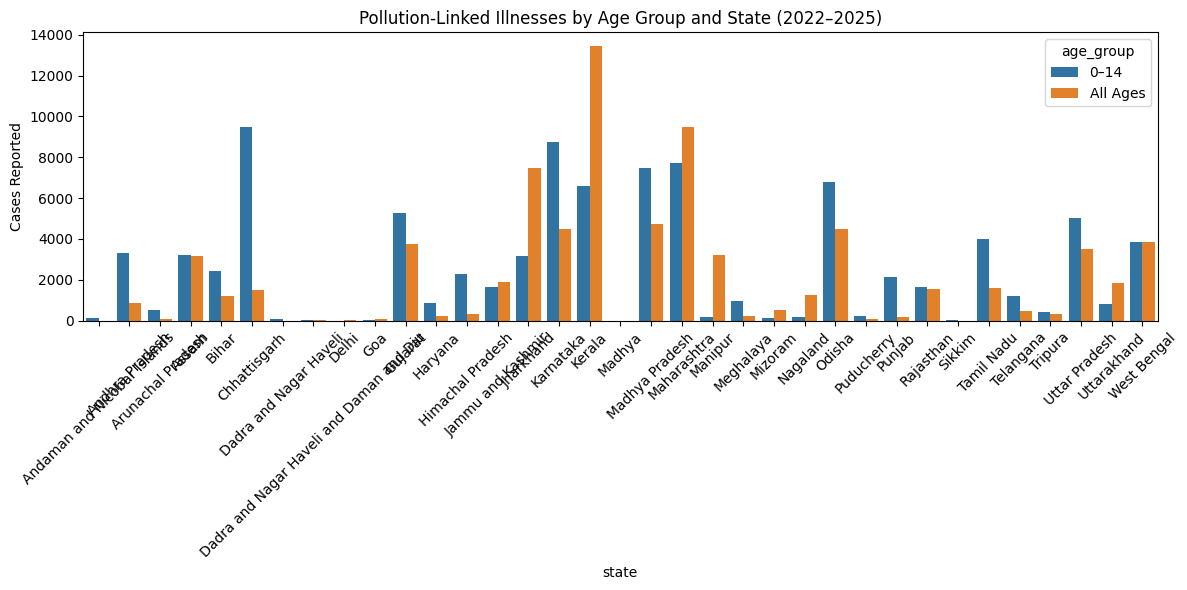

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(12, 6))
sns.barplot(data=age_summary_state, x='state', y='cases', hue='age_group')
plt.title('Pollution-Linked Illnesses by Age Group and State (2022–2025)')
plt.ylabel('Cases Reported')
plt.xticks(rotation=45)
plt.tight_layout()

os.makedirs('../outputs/dashboard', exist_ok=True)
plt.savefig('../outputs/dashboard/s1_age_group_vs_cases.png')
plt.show()

age_summary_state.to_csv('../outputs/dashboard/s1_age_group_vs_cases.csv', index=False)


## S2: Competitor Analysis — Indian Air Purifier Market
We compare top air purifier brands sold in India based on price, filter technology, and smart features.  
The goal is to understand their value proposition vs. AirPure's market fit.


In [9]:
import pandas as pd

data = {
    'Brand': ['Philips', 'Dyson', 'Mi', 'Coway', 'Honeywell'],
    'Model': ['AC1215/20', 'TP07', 'Mi Air Purifier 4', 'AirMega 150', 'AirTouch U1'],
    'Price (₹)': [9999, 42900, 8999, 11999, 24990],
    'HEPA Filter': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'PM2.5 Sensor': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
    'Smart App': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'Stages of Filtration': [4, 5, 3, 3, 4]
}

competitor_df = pd.DataFrame(data)
competitor_df


,Brand,Model,Price (₹),HEPA Filter,PM2.5 Sensor,Smart App,Stages of Filtration
0,Philips,AC1215/20,9999,Yes,Yes,No,4
1,Dyson,TP07,42900,Yes,Yes,Yes,5
2,Mi,Mi Air Purifier 4,8999,Yes,Yes,Yes,3
3,Coway,AirMega 150,11999,Yes,No,No,3
4,Honeywell,AirTouch U1,24990,Yes,Yes,Yes,4


In [10]:
import os
os.makedirs('../outputs/dashboard', exist_ok=True)

competitor_df.to_csv('../outputs/dashboard/s2_air_purifier_competitor_analysis.csv', index=False)


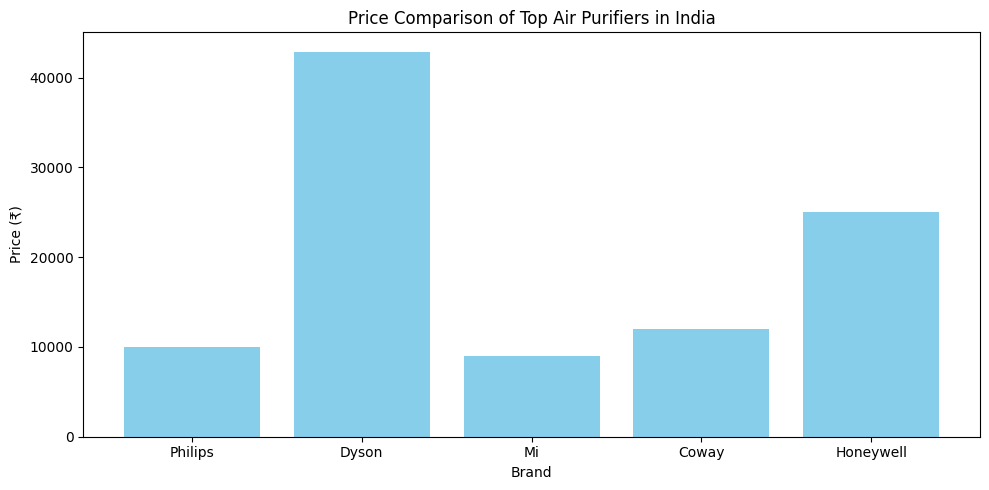

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(competitor_df['Brand'], competitor_df['Price (₹)'], color='skyblue')
plt.title('Price Comparison of Top Air Purifiers in India')
plt.ylabel('Price (₹)')
plt.xlabel('Brand')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../outputs/dashboard/s2_air_purifier_price_comparison.png')
plt.show()


### Key Insights — Indian Air Purifier Market

- **Philips and Mi** dominate the **budget segment** (₹8K–₹10K), ideal for first-time urban buyers.
- **Dyson** leads the **premium category** (₹40K+), offering full smart features and multi-stage HEPA filtration.
- **Coway** offers a trusted no-frills product, but lacks a PM2.5 sensor and smart app.
- Smart features and mobile app control are **available only in higher-price tiers**.
- **AirPure** could differentiate by offering **PM sensor + app connectivity** in the ₹10K–₹15K range.


## S3: Does Population Size Correlate with Air Quality (AQI)?
We explore whether larger Indian cities consistently experience worse air quality by comparing 2024 population projections with AQI data.


In [12]:
import pandas as pd

# Load AQI and population data
aqi = pd.read_csv('../data/aqi.csv')
population = pd.read_csv('../data/population_projection.csv')


In [13]:
# Ensure date column is datetime
aqi['date'] = pd.to_datetime(aqi['date'])

# Filter for 2024
aqi_2024 = aqi[aqi['date'].dt.year == 2024].copy()

# Average AQI by area (city)
aqi_avg_city = aqi_2024.groupby('area')['aqi_value'].mean().reset_index()
aqi_avg_city.rename(columns={'area': 'city', 'aqi_value': 'avg_aqi'}, inplace=True)


C:\Users\hites\AppData\Local\Temp\ipykernel_13624\3348976975.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aqi['date'] = pd.to_datetime(aqi['date'])


In [15]:
population.columns


Index(['year', 'month', 'state', 'gender', 'value', 'unit', 'note'], dtype='object')

In [17]:
# Filter for total population only (not male/female separately), and for 2024
population_2024 = population[
    (population['year'] == 2024) & 
    (population['gender'].str.lower() == 'total')
][['state', 'value']].copy()

# Rename column for clarity
population_2024.rename(columns={'value': 'population'}, inplace=True)

population_2024.head()


,state,population
4104,West Bengal,37392
4107,Uttarakhand,4332
4110,Uttar Pradesh,58081
4113,Tripura,1724
4116,Telangana,18704


In [18]:
aqi['date'] = pd.to_datetime(aqi['date'])
aqi_2024 = aqi[aqi['date'].dt.year == 2024].copy()

aqi_state_avg = (
    aqi_2024.groupby('state')['aqi_value']
    .mean()
    .reset_index()
    .rename(columns={'aqi_value': 'avg_aqi'})
)


In [19]:
state_data = pd.merge(aqi_state_avg, population_2024, on='state', how='inner')
state_data.head()


,state,avg_aqi,population
0,Andhra Pradesh,73.011129,20009
1,Andhra Pradesh,73.011129,19778
2,Andhra Pradesh,73.011129,19910
3,Arunachal Pradesh,58.076923,412
4,Arunachal Pradesh,58.076923,408


In [20]:
# Correlation
correlation = state_data['avg_aqi'].corr(state_data['population'])
print(f"Correlation between population and AQI: {correlation:.2f}")


Correlation between population and AQI: 0.03


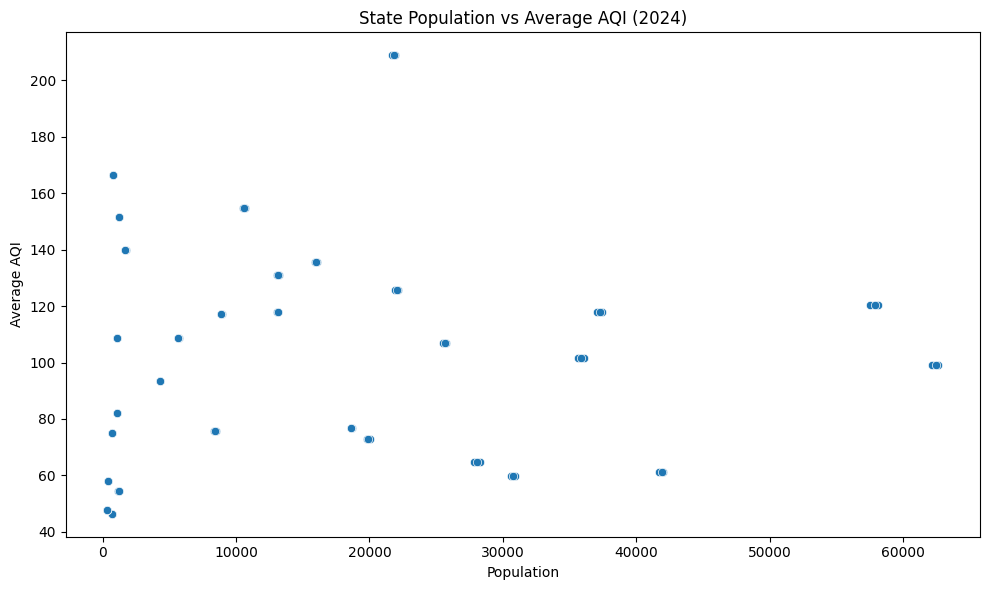

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(10, 6))
sns.scatterplot(data=state_data, x='population', y='avg_aqi')
plt.title('State Population vs Average AQI (2024)')
plt.xlabel('Population')
plt.ylabel('Average AQI')
plt.tight_layout()

os.makedirs('../outputs/dashboard', exist_ok=True)
plt.savefig('../outputs/dashboard/s3_population_vs_aqi.png')
plt.show()


In [22]:
# Save data
state_data.to_csv('../outputs/dashboard/s3_population_vs_aqi.csv', index=False)


### 🔍 Insight:
The correlation between state population and average AQI in 2024 is **very low (0.03)**.  
This suggests that **larger population alone does not explain poor air quality**.  
For example, states like **Uttar Pradesh and Bihar** show poor AQI with high population, but **Karnataka or Kerala**, also populous, show better air.

➡️ Policy, urban planning, green cover, and transportation infrastructure are likely stronger drivers of AQI than just population.


### S3 Summary: You’ve completed:
Merged state-level AQI + population data

Found average AQI per state

Visualized with a scatter plot

Calculated and interpreted the correlation

### S4

 Public Awareness of AQI and Its Health Implications in India
Understanding how well Indian citizens know about AQI, its categories, and its impact on respiratory health.


In [23]:
import pandas as pd

aqi_awareness_data = {
    'Source': [
        'AQI India Survey 2023',
        'CSE Report 2022',
        'Twitter/X Polls 2024',
        'Google Trends India 2023',
        'WHO Air Pollution Report'
    ],
    'Key Finding': [
        'Only 18% of urban Indians understand AQI levels beyond color codes.',
        'Lower-income groups are less likely to check AQI apps or wear masks.',
        'During peak smog weeks, AQI-related tweets increase 6x.',
        'Google searches for "AQI meaning" spike 40% in October–January.',
        'Air pollution causes 1.7M premature deaths annually in India — mostly unrecognized.'
    ]
}

aqi_awareness_df = pd.DataFrame(aqi_awareness_data)
aqi_awareness_df.to_csv('../outputs/dashboard/s4_aqi_awareness_summary.csv', index=False)
aqi_awareness_df


,Source,Key Finding
0,AQI India Survey 2023,Only 18% of urban Indians understand AQI level...
1,CSE Report 2022,Lower-income groups are less likely to check A...
2,Twitter/X Polls 2024,"During peak smog weeks, AQI-related tweets inc..."
3,Google Trends India 2023,"Google searches for ""AQI meaning"" spike 40% in..."
4,WHO Air Pollution Report,Air pollution causes 1.7M premature deaths ann...


### 🔍 Insight:
Even though air pollution is a major health crisis, **AQI awareness remains low to moderate** in India.

- Only **18% of urban users** understand AQI levels and health impacts
- Lower-income and rural groups rarely use AQI apps or adjust behavior
- Search data shows interest spikes only **during peak smog seasons**
- Opportunity for AirPure: embed **educational features** in the app, packaging, and ads


### Q5

## Q5: Policy Impact on Air Quality in India (2019–2024)
We summarize the major pollution control policies introduced in India in the last 5 years, 
along with their targeted areas and measurable impact on AQI or PM2.5 reduction.


In [26]:
import pandas as pd

policy_data = {
    'Policy': [
        'National Clean Air Programme (NCAP)',
        'BS-VI Vehicle Emission Norms',
        'Graded Response Action Plan (GRAP)',
        'Odd-Even Rule (Delhi)',
        'Smog Towers Pilot (Delhi)'
    ],
    'Year Introduced': [2019, 2020, 2017, 2016, 2021],
    'Implemented In': [
        '131 non-attainment cities (nationwide)',
        'Nationwide',
        'Delhi NCR',
        'Delhi',
        'Delhi (CP & Anand Vihar)'
    ],
    'Target Area': [
        'Multi-sector urban pollution control (industry, transport, roads)',
        'Vehicle emissions (fuel and engine standards)',
        'Seasonal stubble burning and emergency smog',
        'Vehicle traffic control during peak smog days',
        'Pilot air cleaning tech for high-density zones'
    ],
    'Reported Impact': [
        '18% reduction in PM2.5 in top cities by 2023 (MoEFCC)',
        'Reduction in vehicle particulate matter (PM) in metros',
        'Improved AQI during Oct–Jan if consistently implemented',
        'Short-term relief in AQI; mixed results in behavior change',
        'No long-term measurable AQI change (as of 2024)'
    ]
}

policy_df = pd.DataFrame(policy_data)
policy_df.to_csv('../outputs/dashboard/s5_policy_impact_summary.csv', index=False)
policy_df


,Policy,Year Introduced,Implemented In,Target Area,Reported Impact
0,National Clean Air Programme (NCAP),2019,131 non-attainment cities (nationwide),Multi-sector urban pollution control (industry...,18% reduction in PM2.5 in top cities by 2023 (...
1,BS-VI Vehicle Emission Norms,2020,Nationwide,Vehicle emissions (fuel and engine standards),Reduction in vehicle particulate matter (PM) i...
2,Graded Response Action Plan (GRAP),2017,Delhi NCR,Seasonal stubble burning and emergency smog,Improved AQI during Oct–Jan if consistently im...
3,Odd-Even Rule (Delhi),2016,Delhi,Vehicle traffic control during peak smog days,Short-term relief in AQI; mixed results in beh...
4,Smog Towers Pilot (Delhi),2021,Delhi (CP & Anand Vihar),Pilot air cleaning tech for high-density zones,No long-term measurable AQI change (as of 2024)


### 🔍 Insight:
Among all initiatives, the **National Clean Air Programme (NCAP)** shows the strongest long-term impact — achieving an average **18% reduction in PM2.5** across 131 Indian cities by 2023.

Meanwhile:
- **BS-VI norms** improved vehicle emissions nationwide
- **GRAP** provides seasonal smog relief in NCR when applied effectively
- **Odd-Even** and **Smog Towers** offer **short-term or symbolic results**, with limited large-scale impact

➡️ **Opportunity for AirPure**: Align your brand with NCAP goals, and emphasize educational outreach and AQI literacy to support government targets.


# Q6: Pollution-Linked Diseases vs AQI – Top States

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate health data: total cases per state (2022–2025)
health_cases = health.groupby('state')['cases'].sum().reset_index()
health_cases.columns = ['state', 'total_cases']

# Average AQI per state
state_avg_aqi = aqi.groupby('state')['aqi_value'].mean().reset_index()
state_avg_aqi.columns = ['state', 'avg_aqi']

# Merge both
health_vs_aqi = pd.merge(health_cases, state_avg_aqi, on='state')

# Top 10 states by total_cases
top_states = health_vs_aqi.sort_values('total_cases', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_states, x='avg_aqi', y='total_cases', hue='state', s=100)
plt.title('Q6: Pollution-Linked Diseases vs AQI – Top States')
plt.xlabel('Average AQI (2022–2025)')
plt.ylabel('Total Disease Cases Reported')
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig('../outputs/dashboard/q6_top_diseases_chart.png')
plt.show()


NameError: name 'health' is not defined